In [68]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt

In [17]:
def generate_maintenance_matrix(n_states, max_allowed_state, repair_state):
    # state indexes start at 1!
    mat = np.tile(0, (n_states, n_states))
    for i in range(max_allowed_state):
        mat[i][i] = 1
    for i in range(max_allowed_state, n_states):
        mat[i][repair_state - 1] = 1
    return mat

In [23]:
state_count = 5
policy_1 = generate_maintenance_matrix(state_count, 3, 2)
policy_1

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [184]:
def generic_cost_function(n, initial_state_vector, transition_matrix, maintenance_matrix, quantile_vector, horizon, cm_cost, pm_cost):
    cycle_count = math.floor(horizon / n)
    cm_count = 0
    for i in range(1, horizon+1):
        if i % n == 0:
            initial_state_vector = initial_state_vector @ maintenance_matrix
        else:
            initial_state_vector = initial_state_vector @ transition_matrix
            
        #print(i, initial_state_vector)
        cm_count += initial_state_vector @ quantile_vector
    #chain_state = initial_state_vector @ np.linalg.matrix_power(transition_matrix, horizon - cycle_count) @ np.linalg.matrix_power(maintenance_matrix, cycle_count)
    #print(n, cycle_count,  chain_state)
    #cm_count = chain_state @ quantile_vector
    return cm_count * cm_cost + cycle_count * pm_cost

In [187]:
bounds = [
    (0, None)
]
state_vector = np.array([1,0,0,0,0], np.float64)
quantile_vector = np.array([1, 3, 5, 7, 9], np.float64)
transition_matrix = np.array([
    [0.95, 0.05, 0, 0, 0],
    [0, 0.85, 0.14, 0.01, 0],
    [0, 0, 0.8, 0.19, 0.01],
    [0, 0, 0, 0.75, 0.25],
    [0, 0, 0, 0, 1]    
], np.float64)
cm_cost = 1.0
pm_cost = 3.0
horizon = 60

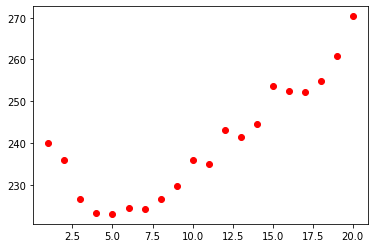

In [188]:
ax = plt.gca()
for x in range(1, 21):
    cost = generic_cost_function(x, state_vector.copy(), transition_matrix.copy(), policy_1.copy(), quantile_vector.copy(), horizon, cm_cost, pm_cost)
    #print(x, cost)
    ax.plot(x, cost, "ro")